# 15 Minutes or Less!
## Todd Schultz
Due: December 10, 2017

# Abstract
Today's air transportation system has never provided more options for moving about the globe. However, the increase availability of flights has strained resources in the US that were designed and built decades ago for a much smaller air transportation system. Now, delays and cancellations are common in the US air traffic system and generates an enourmous amount wasted time. This report analyzes public domain data from the US Department of Transportation's Bureau of Transportation Statistics to compare the average delays for airports that service the same major metropolitan area. Such airports include O'Hare International Airport and Chicago Midway International Airport for the greater Chicago metropolitan area. The goal is to determine if their is a significant difference in the proportion of delays for the airports and to make recommendations as to which one to choice to most likely avoid delays in excess of 15 minutes. 

# Introduction/Background
The US air transportation offers great freedon and flexibility to move about the globe. However, the entire system has become very complex and interdependent on all the airports and airlines holding their schedules. However, delays and cancelleations are inevitable due to issues such as weather, mechanical failure, and surpriseingly, computer glitches. The delays and cancellations cause a large burden on the passangers in terms of wasted time sitting at airport unnecessarily. Moreover, the data regarding delayed and cancelled flights are pulbicly available from the US Department of Transportation's (US DOT) Bureau of Transportation Statistics and can be analyzed for factors that are correlated to the delays. Previous analysis have been performed on the data and some have been made public through the [Kaggle Datasets Flight Delays and Cancellation](https://www.kaggle.com/usdot/flight-delays) entry. However, the previous analyses focused on createing a predictive model of the delay time for a flight or analysis of on-time performance based on the airline, see [USAToday article](https://www.usatoday.com/story/travel/flights/todayinthesky/2016/01/07/airline-on-time-performance/78407958/). This study takes different approach and will focus on only a single contributing factor to a flight delay, namely the arrival airport. In particular, airports servicing the same metropolitan area will be statistically compared to identify if there are significant difference in the number of flights that are delayed to determine if there is a prefered airport that helps the traveler avoid delays and frustration.  

## Human-centered considerations
The human-centered data science considerations found in this study are as follows. The first is that the goal is aimed at helping people avoid excess waiting times. Traveling is stressful enough without delays and cancellations so helping avoid them can help reduce the anxiety of traveling and provide a smoother more pleasant experience for all travelers. The second issue is the usability of the results. This study will likely be limited to a statical analysis on historical data. In the US, the data is readily available in the public domain from the US DOT. Unfortunately, this is unlikely to be the case around the world. The conclusions from this study are limited to the year 2015 and do not reflect any changes or improvements in the US air transportation made operational after that year. 

## Hypothesis
The propbability of a delayed flight into airports serving the same metropolitan area are equal. Rejecting the null hypothesis indicates a statistically significant difference in the occurence of delayed flights between the airports.

# Methodology
This study focuses on a single contributing factor to flight arrival delays which is the arrival airport. The goal is to determine if their is a difference in the proportion of flights that are delayed arriving into the airports that service the same metropolitan area regardless if the cuase was environmental or preventable. Thus all causes of the arrival delay will be considered. For simplicity and to avoid undue bias, all cancelled and diverted flights will be removed from the dataset for analysis since a flight can be diverted or cancelled for many reasons and the dataset doesnot contain adequate information to seperate solely the diverted or cancelled flights due to the arrival airport. After the dataset is cleaned the arrival delays will be examined and compared using statistical tests.   

The study will begin by selecting New York city as major metropolitan market serviced by three major airports, John F. Kennedy International Airport (JFK), LaGuardia Airport (LGA), and Newark International Airport (EWR). The data will be filtered for those airports and methodology developed to segment the flight delays into preventable causes or environemental causes. Next, the portion of the flight delays and cancellations for the preventable delays for each airport will be counted and the portions relative to the total number of flights for the airport statistically compared. With the methodology validated for a single major metropolitan market, an automated algorithm will be developed to identify additional US airport combinations for comparison. The list will be validated by human review and the analysis repeated on those airport combinations approved through the human review. 


## Data source
The flight delay dataset is available from Kaggle Datasets under a CC0:Public domain license. The dataset is offered as a zip file and is downloaded and extracted manually from the [Kaggle Flight Delays](https://www.kaggle.com/usdot/flight-delays) entry. The dataset consists of three files. 
1. airlines.csv - lists 14 major IATA airline codes and the airline name.
2. airports.csv - lists 322 major airports world-wide providing their IATA code, airport name, city, state, country, latitidue, and longitude 
3. flights.csv - contains the listing of flights from 2015 with information about the flight, the departure times, arrival times, delays, and a flag for cancellation.

The Kaggle dataset is a selection of the data available from the US Department of Transportation (DOT) Bureau of Transportation Statistics, which tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly Air Travel Consumer Report, published about 30 days after the month's end, as well as in summary tables posted on this website. The full data files are not provided in this GitHub repo as they exceed the 100 MB file size limit and are readily available on Kaggle Datasets. However, a data file with 100,000 random samples from the full dataset is provided along with support information about the airline and airport codes. The original data source can be found on the [US DOT website](https://www.transportation.gov/airconsumer/air-travel-consumer-reports). 

## Limitations
This study is subjected to limitations regarding any conclusions due to several factors. The largest limiting factor is the limited time scope of the data to be used for analysis. All of the data is from 2015 and does not represent any improvements implemented by the airlines or airport in addressing systematic delay issues. Other limitations center around design decisions regard the definitions of a flight delay. This study uses the US Federal Aviation Administration definition that a flight is considered delayed if it is 15 minitues or later than its scheduled arrival time. Also, a criteria is required to define airports that service the same major metropolitan markets that can be automated. While some major metropolitan markets are easy to define relative to airport that service them, such as Chicago with O'Hare International Airport and Chicago Midway International Airport, others are much more difficult such as the greater Los Angeles area where up to six airports could be considered. The identified comparible airports is limited by the metric definition and human review. This study is also limited by decision to remove diverted and cancelled flights due to the lack of data regarding the reasons for diverting or cancellation. 

## Packages
The packages used in this notebook are all called here. This allows for easy visibility into the packages used and required to run this notebook. 

In [27]:
# Package imports
import numpy as np
import scipy as sp
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

## Dataset import
The full dataset is loaded into memory and cleaned to remove missing values, and to remove the diverted and cancelled flights. 

In [50]:
# Import data
# Import delay data from file and filter to NYC airports
delayfile = 'flight-delays\\flights.csv'
delaydata = pd.read_csv(delayfile)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
# print size of initial dataset
ninitial,ncol = delaydata.shape
print('Initial dataset size: ' + str(delaydata.shape))

# drop missing flights with missing values
delaydata.dropna()

# remove diverted and cancelled flights
delaydata = delaydata[delaydata['DIVERTED'] == 0]
delaydata = delaydata[delaydata['CANCELLED'] == 0]

# print new size of working dataset and percentage losted
nworking,ncol = delaydata.shape
print('Final dataset size: ' + str(delaydata.shape))
print('Precent of data lost: ' + str(100*(ninitial-nworking)/ninitial))


Initial dataset size: (5819079, 31)
Final dataset size: (5714008, 31)
Precent of data lost: 1.8056293788071962


Removing the cancelled and diverted flights removed less than 2% of the overall flights and have minimal impact on the study. 

# Findings
This sections describes the individual analysis and results for the unique, individual metropolitan areas. 

## New York City
New York city is serviced by by three major airports, John F. Kennedy International Airport (JFK), LaGuardia Airport (LGA), and Newark International Airport (EWR). These three airports will be compared as for their proportion of delayed flights. First the data for the three airports is seperated out and all NaN values removed from the 'ARRIVAL_DELAY' column. Next, the arrival delays are compare visually using histograms and statistically using t-tests. 

In [5]:
# Filter for NYC airports
# JFK (93809), LGA 99581, EWR (101830)
IJFK = delaydata['DESTINATION_AIRPORT'] == 'JFK'
ILGA = delaydata['DESTINATION_AIRPORT'] == 'LGA'
IEWR = delaydata['DESTINATION_AIRPORT'] == 'EWR'
INYC = np.column_stack((IJFK,ILGA,IEWR)).any(axis=1)
jfkdata = delaydata[IJFK]
lgadata = delaydata[ILGA]
ewrdata = delaydata[IEWR]

print('Number of flights for JFK: ' + str(sum(IJFK)))
print('Number of flights for LGA: ' + str(sum(ILGA)))
print('Number of flights for EWR: ' + str(sum(IEWR)))

Number of flights for JFK: 91587
Number of flights for LGA: 94527
Number of flights for EWR: 98223


The number of flights for each of the three airports are similar and greater than 90,000 flights. This should provide sufficient data for statistical analysis. The volume of the flights into each airport are on the same order of magnitude and should not limit the analysis. Next, let's visualize the histograms of the delays for each of the three airports. The histograms are divided into bins of 15 minutes each as the FAA defines a delayed flight by a delay of 15 minutes or greater. This way the first bin represents the number of on-time flights.

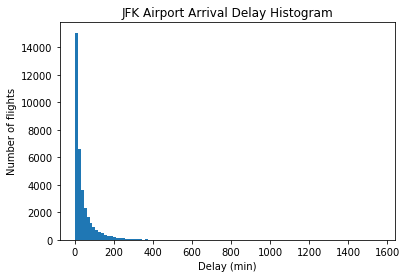

In [30]:
# JFK histogram
plt.hist(np.array(jfkdata['ARRIVAL_DELAY']),bins=range(0,np.int(jfkdata['ARRIVAL_DELAY'].max()+15),15))
plt.title("JFK Airport Arrival Delay Histogram")
plt.xlabel("Delay (min)")
plt.ylabel("Number of flights")

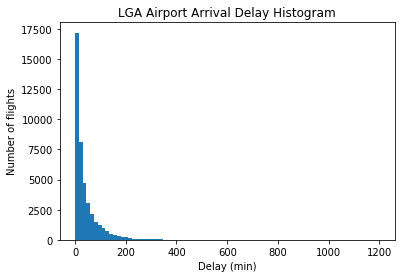

In [29]:
# LGA histogram
plt.hist(np.array(lgadata['ARRIVAL_DELAY']),bins=range(0,np.int(lgadata['ARRIVAL_DELAY'].max()+15),15))
plt.title("LGA Airport Arrival Delay Histogram")
plt.xlabel("Delay (min)")
plt.ylabel("Number of flights")

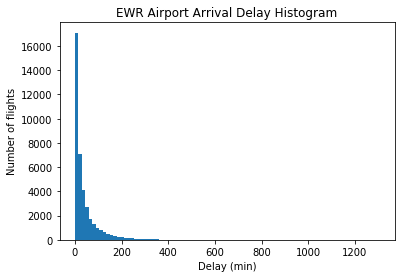

In [28]:
# EWR histogram
plt.hist(np.array(ewrdata['ARRIVAL_DELAY']),bins=range(0,np.int(ewrdata['ARRIVAL_DELAY'].max()+15),15))
plt.title("EWR Airport Arrival Delay Histogram")
plt.xlabel("Delay (min)")
plt.ylabel("Number of flights")

The histograms show that the majority of flights are delayed less than 15 minutes wit the number of flights approximately exponentially rolling off as the arrival delay increases for all three airports. The scaling of the axis of the histograms also indicate that a few large arrival delays, delays greater than 1,000 minutes are present for each airport. Next, compute and compare the mean arrive delay for the three airports. This is performed using one-way ANOVA, Tukey Honest Significant Differences multiple comparison, to test the differences in mean values. These tests assume an underlying normal  distribution which the histograms above show as invalid for the arrival delay data. However, these methods are known to be robust to violations in their assumptions, but the data are then checked using a Kolmogorov-Smirnov 2-sample test on the pairwise combinations to test for differences in the distributions without a normal assumption. 

In [8]:
# Compute and compare mean
d = {'JFK': np.mean(jfkdata['ARRIVAL_DELAY']), 'LGA': np.mean(lgadata['ARRIVAL_DELAY']), 'EWR': np.mean(ewrdata['ARRIVAL_DELAY'])}
nycmean = pd.DataFrame(data=d,index={'Mean'})
nycmean

,EWR,JFK,LGA
Mean,7.464891,6.699455,10.396437


In [12]:
# One way ANOVA
sp.stats.f_oneway(jfkdata['ARRIVAL_DELAY'],lgadata['ARRIVAL_DELAY'],ewrdata['ARRIVAL_DELAY'])

F_onewayResult(statistic=154.77539805744127, pvalue=6.5835766879919641e-68)

group1,group2,meandiff,lower,upper,reject
EWR,JFK,-0.7654,-1.283,-0.2479,True
EWR,LGA,2.9315,2.4182,3.4449,True
JFK,LGA,3.697,3.1746,4.2194,True


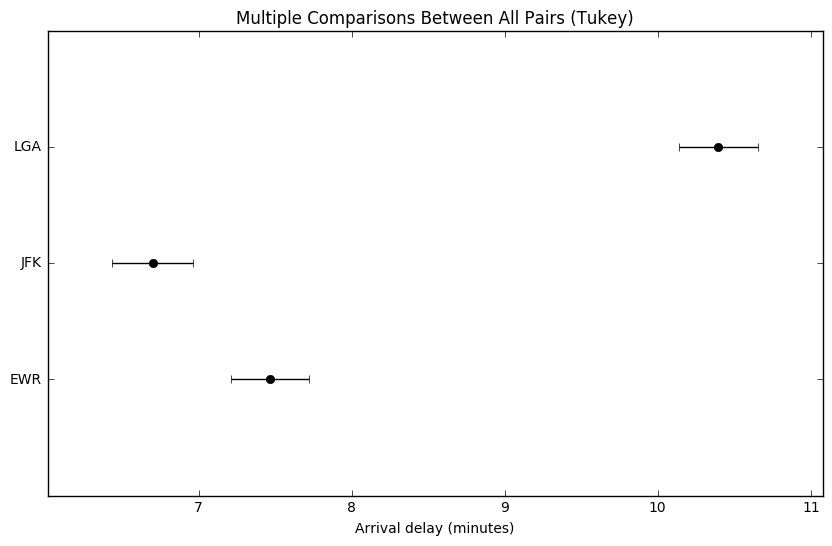

In [13]:
# Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
nycdata = delaydata[INYC]

tukey = pairwise_tukeyhsd(endog=nycdata['ARRIVAL_DELAY'],groups=nycdata['DESTINATION_AIRPORT'],alpha=0.05)

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.xlabel('Arrival delay (minutes)')

tukey.summary()              # See test summary

In [14]:
# Kolmogorov-Smirnov 2-sample test
#jfkdata['ARRIVAL_DELAY'],lgadata['ARRIVAL_DELAY'],ewrdata['ARRIVAL_DELAY']
sp.stats.ks_2samp(jfkdata['ARRIVAL_DELAY'],lgadata['ARRIVAL_DELAY'])
sp.stats.ks_2samp(jfkdata['ARRIVAL_DELAY'],ewrdata['ARRIVAL_DELAY'])
sp.stats.ks_2samp(lgadata['ARRIVAL_DELAY'],ewrdata['ARRIVAL_DELAY'])

Ks_2sampResult(statistic=0.046907729153106148, pvalue=1.3755048981223102e-92)

The results of the one-way ANOVA, the pairwise multiple comparison, and the 2-sample Kolmogorov-Smirnov test reject the null hypothesis (pvalue < 0.05) of equal means for all three pairs of the New York City airports. None of the confidence intervals of the pairwise mean differences include zero nor does the multiple comparison figure show any overlap between the any of the confidence intervals, again showing a statistically significant difference between the means of the arrival delay. 

Now consider the proportion of flight at that were delayed. Again, teh FAA defines a flight delayed if actually arrival time is 15 minutes later then the scheduled time. 

In [52]:
# Compute and compare proportion of late flights
d = {'JFK': np.mean(jfkdata['ARRIVAL_DELAY'] > 15), 'LGA': np.mean(lgadata['ARRIVAL_DELAY'] > 15), 'EWR': np.mean(ewrdata['ARRIVAL_DELAY'] > 15)}
nycprops = pd.DataFrame(data=d,index={'Proportion Late'})
nycprops

,EWR,JFK,LGA
Proportion Late,0.218014,0.214627,0.254774


In [56]:
# Create dataframe to store proportion test results
d = {'Airport 1' : pd.Series(['JFK', 'JFK', 'LGA']),
     'Airport 2' : pd.Series(['LGA', 'EWR', 'EWR']),
     'p-value' : pd.Series([np.nan,np.nan,np.nan])}
nycproptest = pd.DataFrame(d)
nycproptest

,Airport 1,Airport 2,p-value
0,JFK,LGA,NaN
1,JFK,EWR,NaN
2,LGA,EWR,NaN


In [58]:
# Compare proportions using Proportions Z test
props = {'JFK': np.sum(jfkdata['ARRIVAL_DELAY'] > 15), 'LGA': np.sum(lgadata['ARRIVAL_DELAY'] > 15), 'EWR': np.sum(ewrdata['ARRIVAL_DELAY'] > 15)}
#props = np.array([np.sum(jfkdata['ARRIVAL_DELAY'] > 15),np.sum(lgadata['ARRIVAL_DELAY'] > 15),np.sum(ewrdata['ARRIVAL_DELAY'] > 15)])
tot = {'JFK': np.array(jfkdata['ARRIVAL_DELAY']).size, 'LGA': np.array(lgadata['ARRIVAL_DELAY']).size, 'EWR': np.array(ewrdata['ARRIVAL_DELAY']).size}
#tot = np.array([np.array(jfkdata['ARRIVAL_DELAY']).size,np.array(lgadata['ARRIVAL_DELAY']).size,np.array(ewrdata['ARRIVAL_DELAY']).size])

#statsmodels.stats.proportion.proportions_ztest(props, tot, value=None, alternative='two-sided', prop_var=False)
# JFK and LGA
zstat,pval = proportions_ztest([props['JFK'], props['LGA']], [tot['JFK'], tot['LGA']], value=None, alternative='two-sided', prop_var=False)
nycproptest.loc[0,'p-value'] = pval

# JFK and EWR
zstat,pval = proportions_ztest([props['JFK'], props['EWR']], [tot['JFK'], tot['EWR']], value=None, alternative='two-sided', prop_var=False)
nycproptest.loc[1,'p-value'] = pval

# LGA and EWR
zstat,pval = proportions_ztest([props['LGA'], props['EWR']], [tot['LGA'], tot['EWR']], value=None, alternative='two-sided', prop_var=False)
nycproptest.loc[2,'p-value'] = pval

# display results
nycproptest

,Airport 1,Airport 2,p-value
0,JFK,LGA,1.079466e-92
1,JFK,EWR,7.329524e-02
2,LGA,EWR,1.739717e-80


All of the p-values from the proportions Z test reject the null hypothesis and shows a statistically significant difference in the proportions of flights delayed for all three airports. However, the p-value for the comparison of the proportion of delayed flights arriving to JFK and arriving to EWR is only moderately significant with a p-value of 0.073 as compared to the standard 0.05 level of significances. Thus LaGuardia Airport has the highest proportion of flights delayed and the largest mean arrival delay time.  

# Conclusion

# References
Kaggle data set entry
USA Today article